# K-Nearest Neighbors (KNN) Regressor for Insurance Charges Prediction

This notebook demonstrates how to build a K-Nearest Neighbors (KNN) regressor to predict insurance charges.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [2]:
df = pd.read_csv("../../artifacts/row_data/structure_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Preprocessing and Model Training

In [3]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MSE: 30459865.823198732
RMSE: 5519.045734834848
R² Score: 0.8037995832203448


## 4. Learning Curve

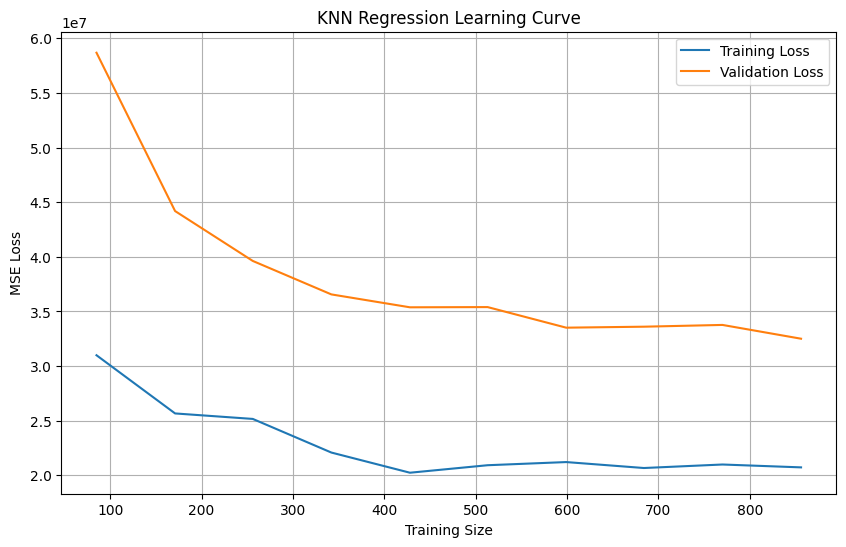

In [4]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_loss = -train_scores.mean(axis=1)
test_loss  = -test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_loss, label='Training Loss')
plt.plot(train_sizes, test_loss, label='Validation Loss')
plt.xlabel("Training Size")
plt.ylabel("MSE Loss")
plt.title("KNN Regression Learning Curve")
plt.legend()
plt.grid()
plt.show()

## 5. Residual Plot

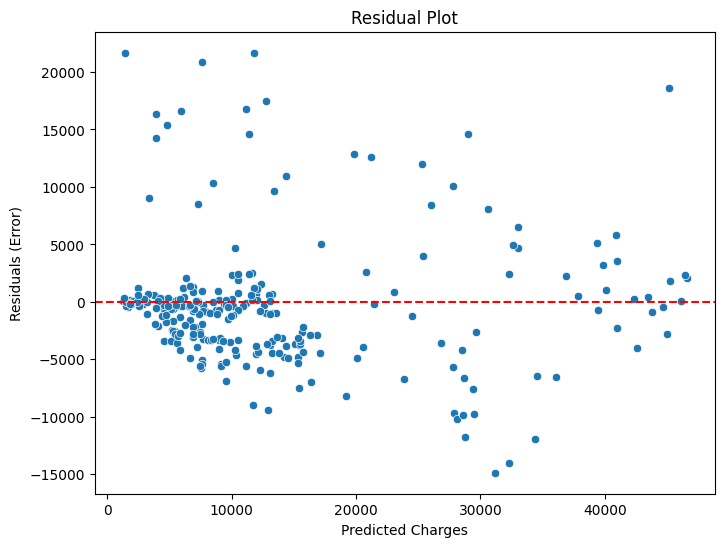

In [5]:
# Plot the residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

## 6. Error Distribution

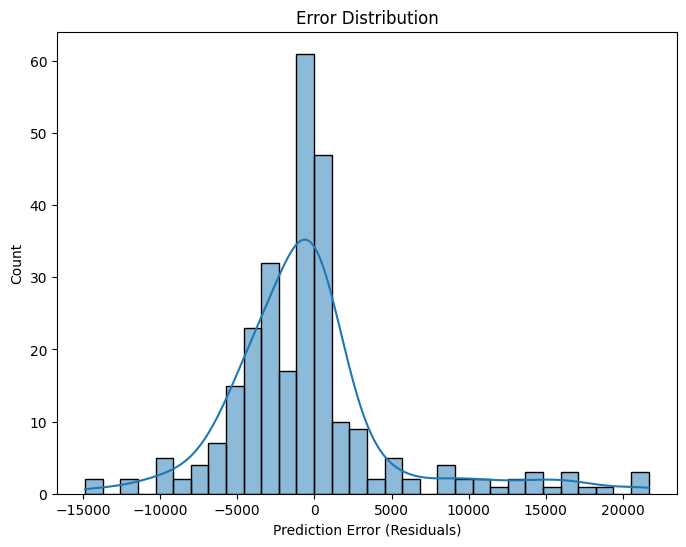

In [6]:
# Plot the distribution of prediction errors
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.title("Error Distribution")
plt.show()

## 7. Actual vs. Predicted Plot

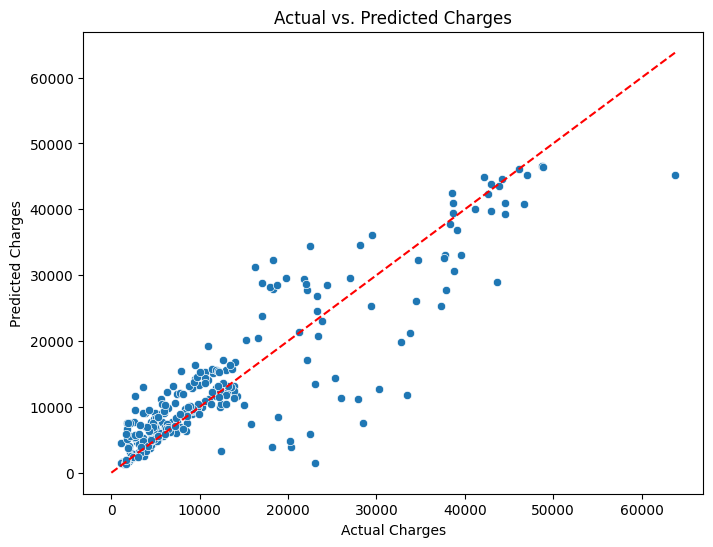

In [7]:
# Plot actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()